In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [355]:
#first load the 'companies.txt' file into dataframes
companies_url = '/Users/balwant/Desktop/DataScience/PG_Diploma_in Machine_Learning_and_AI_March_2020/Assignment/Funds-Investment/data/companies.txt'
companies = pd.read_csv(companies_url, encoding= 'ISO-8859-1',delimiter='\t')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [356]:
#After that load the 'rounds2.csv' file into dataframes
#Now change the encoding to convert into redable text.

rounds2_url = '/Users/balwant/Desktop/DataScience/PG_Diploma_in Machine_Learning_and_AI_March_2020/Assignment/Funds-Investment/data/rounds2.csv'
rounds2 = pd.read_csv(rounds2_url,encoding= 'ISO-8859-1',delimiter=',') 
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [357]:
#Here changing the encoding type to avoid encoding issue
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

## 1.1 - Understanding the Data Set

In [358]:
# How many unique companies are present in rounds2?
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(len(rounds2['company_permalink'].unique()))

66368


In [359]:
#Finding the same result with another way.
rounds2['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [360]:
#How many unique companies are present in the companies file?
companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))

66368


In [361]:
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
unique_companies = pd.DataFrame(companies.permalink.str.lower().unique())
unique_rounds2_companies = pd.DataFrame(rounds2.company_permalink.str.lower().unique())
unique_companies.equals(unique_rounds2_companies)

True

In [362]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
#Name the merged frame master_frame. How many observations are present in master_frame ? 
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
len(master_frame.index)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


## Data Cleaning

In [363]:
#Checking for null values
master_frame.isnull().sum(axis = 0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [364]:
#Inspecting the Null values in percentage.
print(round(100*(master_frame.isnull().sum()/master_frame.shape[0]), 2))

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64


In [365]:
#Removing or deleting unnecessary columns
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [366]:
#Checking for Null values after deletion of unnecessary columns.
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd    17.39
name                  0.00
category_list         2.97
country_code          7.55
dtype: float64


In [367]:
#Dropping rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

## 2.1 - Average Values of Investments for Each of these Funding Types

In [368]:
#Extracting the unique funding_round_type
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [369]:
#Removing all funding type except the following 4 investment types.
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,"10,000,000.00",#fame,Media,IND
2,/organization/-qounter,seed,"700,000.00",:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,"2,000,000.00",0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,"43,360.00",Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,"719,491.00",Ondine Biomedical Inc.,Biotechnology,CAN


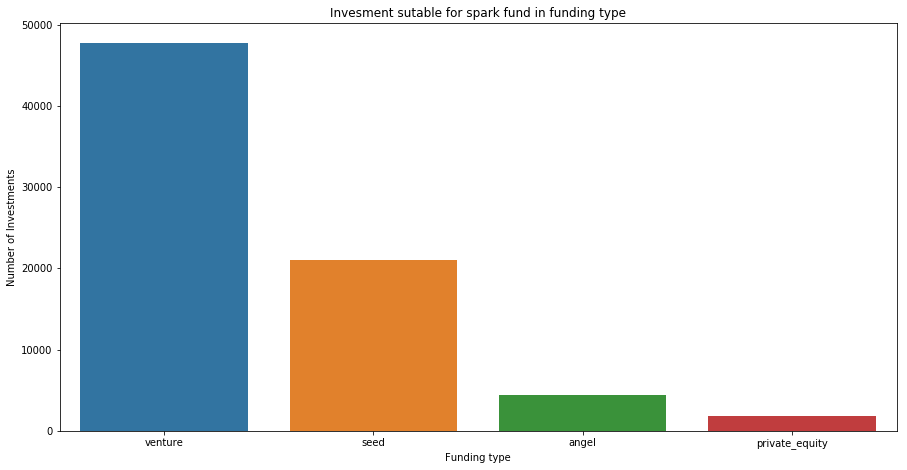

In [370]:
#Invesment sutable for spark fund in funding type
funding_type_frame = master_frame.groupby('funding_round_type')['raised_amount_usd'].count().sort_values(ascending=False).to_frame() 
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=funding_type_frame.reset_index())
bar.set(xlabel='Funding type', ylabel='Number of Investments')
bar.set_title('Invesment sutable for spark fund in funding type')
plt.show()

In [371]:
#Average funding amount of fundings type
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)
investments_type_mean_frame = master_frame 

In [372]:
#Keeping rows with only venture type. because Spark Funds wants to invest between 5 to 15 million USD per investment round
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

In [373]:
#Dropping the column 'funding_round_type' as all funding are belongs to venture type.
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

## 3.1 - Analysing the Top 3 English-Speaking Countries

In [374]:
#For the chosen investment type, make a data frame named top9 with the top nine countries.
#based on the total investment amount each country has received.

top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]
top9

,raised_amount_usd
country_code,
USA,"420,068,029,342.00"
CHN,"39,338,918,773.00"
GBR,"20,072,813,004.00"
IND,"14,261,508,718.00"
CAN,"9,482,217,668.00"
FRA,"7,226,851,352.00"
ISR,"6,854,350,477.00"
DEU,"6,306,921,981.00"
JPN,"3,167,647,127.00"


In [375]:
#Keeping rows with only USA, GBR and IND 'country_codes'.
#As SparksFunds wants to invest in only top three English speaking countries.

master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,"10,000,000.00",#fame,Media,IND
10,/organization/0xdata,"20,000,000.00",H2O.ai,Analytics,USA
11,/organization/0xdata,"1,700,000.00",H2O.ai,Analytics,USA
12,/organization/0xdata,"8,900,000.00",H2O.ai,Analytics,USA
22,/organization/1-mainstream,"5,000,000.00",1 Mainstream,Apps|Cable|Distribution|Software,USA


## 5.1 - Sector-wise Investment Analysis
####  1. Extract the primary sector of each category list from the category_list column

####  2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [376]:
#Extracting the primary vector value
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,"10,000,000.00",#fame,Media,IND
10,/organization/0xdata,"20,000,000.00",H2O.ai,Analytics,USA
11,/organization/0xdata,"1,700,000.00",H2O.ai,Analytics,USA
12,/organization/0xdata,"8,900,000.00",H2O.ai,Analytics,USA
22,/organization/1-mainstream,"5,000,000.00",1 Mainstream,Apps,USA


In [377]:
#Load the 'mapping.csv' file into dataframes
mapping_url = '/Users/balwant/Desktop/DataScience/PG_Diploma_in Machine_Learning_and_AI_March_2020/Assignment/Funds-Investment/data/mapping.csv'
mapping = pd.read_csv(mapping_url,encoding= 'ISO-8859-1',delimiter=',')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [378]:
#Mapping primary sector to main sector
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars = mapping.columns.values[1:]) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [379]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()


,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,"10,000,000.00",#fame,Media,IND,Entertainment
1,/organization/0xdata,"20,000,000.00",H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,"1,700,000.00",H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,"8,900,000.00",H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,"5,000,000.00",1 Mainstream,Apps,USA,"News, Search and Messaging"


In [380]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

38638

In [381]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38638 entries, 0 to 38802
Data columns (total 6 columns):
company_permalink    38638 non-null object
raised_amount_usd    38638 non-null float64
name                 38638 non-null object
category_list        38638 non-null object
country_code         38638 non-null object
main_sector          38638 non-null object
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [382]:
#Dropping all rows where investment is not between 5 and 15 million
master_frame = master_frame.drop(master_frame[(master_frame.raised_amount_usd < 5000000)].index)
master_frame = master_frame.drop(master_frame[(master_frame.raised_amount_usd > 15000000)].index)

d1 = master_frame[master_frame['country_code'] == 'USA']
d2 = master_frame[master_frame['country_code'] == 'GBR']
d3 = master_frame[master_frame['country_code'] == 'IND']

 1. Total number of investments (count)

In [383]:
#Total number of investments (count) for country code USA
len(d1)

12012

In [384]:
#Total number of investments (count) for country code GBR
len(d2)

619

In [385]:
#Total number of investments (count) for country code IND
len(d3)

328

In [386]:
#2. Total amount of investment (USD)  for country code USA
d1['raised_amount_usd'].sum()

107318294664.0

In [387]:
#2. Total amount of investment (USD) for country code GBR
d2['raised_amount_usd'].sum()

5365228300.0

In [388]:
#2. Total amount of investment (USD) for country code IND
d3['raised_amount_usd'].sum()

2949543602.0

In [389]:
d1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,"1,454,104,361.00"
Cleantech / Semiconductors,2300,"21,206,628,192.00"
Entertainment,591,"5,099,197,982.00"
Health,909,"8,211,859,357.00"
Manufacturing,799,"7,258,553,378.00"
"News, Search and Messaging",1582,"13,959,567,428.00"
Others,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"


In [390]:
#3. Top sector (based on count of investments) for country code USA
#4. Second-best sector (based on count of investments) for country code USA
#5. Third-best sector (based on count of investments) for country code USA
#6. Number of investments in the top sector ('Others') for USA
sector_on_investments_count = d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
sector_on_investments_sum = d1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)
sector_on_investments_count

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

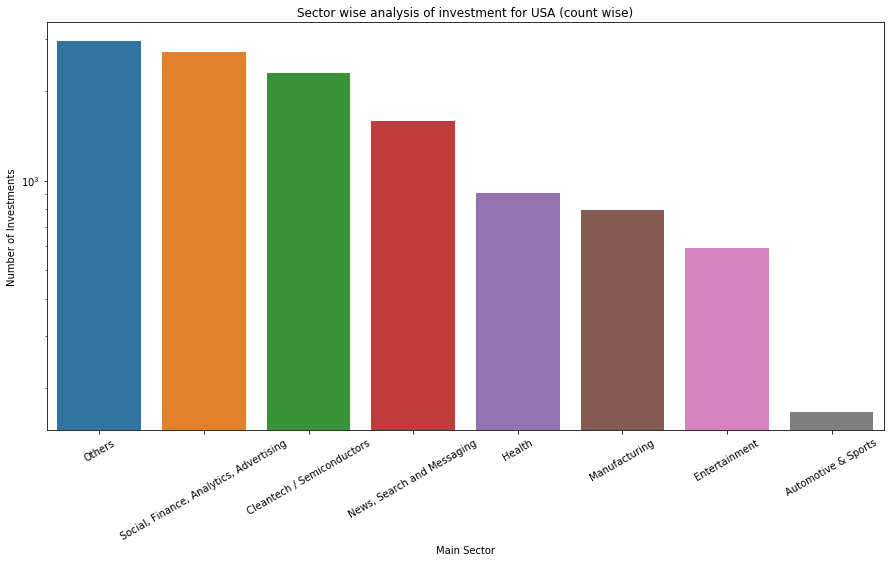

In [391]:
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x='main_sector', y='raised_amount_usd', data=sector_on_investments_count.reset_index())
bar.set(xlabel='Main Sector', ylabel='Number of Investments')
bar.set_title('Sector wise analysis of investment for USA (count wise)')
bar.set_yscale('log')
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)
plt.show()

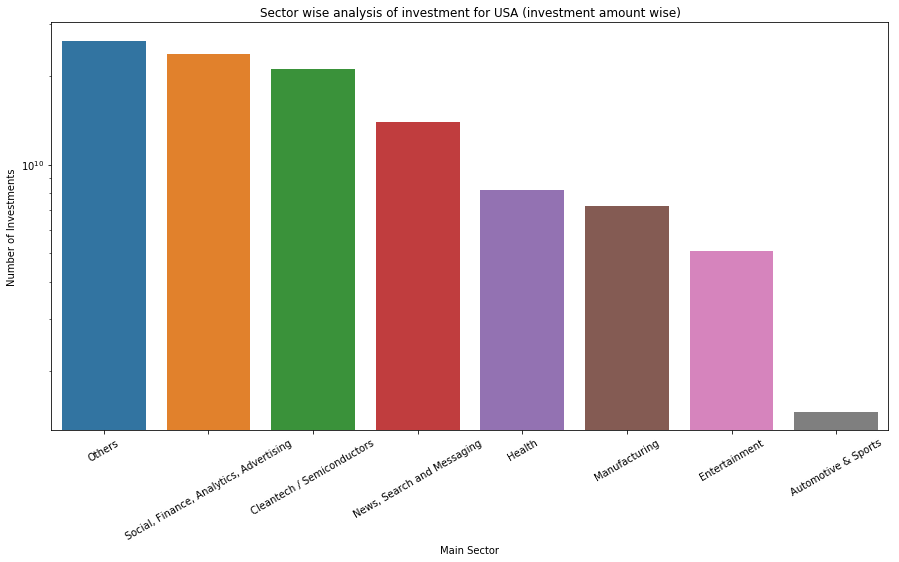

In [392]:
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x='main_sector', y='raised_amount_usd', data=sector_on_investments_sum.reset_index())
bar.set(xlabel='Main Sector', ylabel='Number of Investments')
bar.set_title('Sector wise analysis of investment for USA (investment amount wise)')
bar.set_yscale('log')
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)
plt.show()

In [393]:
#Number of investments in the top sector (refer to point 3) for country code USA
top_sector_investments_count  = sector_on_investments_count.iloc[:1]
top_sector_investments_count

main_sector
Others    2950
Name: raised_amount_usd, dtype: int64

In [394]:
 #7. Number of investments in the second-best sector (refer to point 4) for country code USA
second_best_sector_investments_count  = sector_on_investments_count.iloc[1:2]
second_best_sector_investments_count

main_sector
Social, Finance, Analytics, Advertising    2714
Name: raised_amount_usd, dtype: int64

In [395]:
# 8. Number of investments in the third-best sector (refer to point 5) for country code USA
third_best_sector_investments_count  = sector_on_investments_count.iloc[2:3]
third_best_sector_investments_count

main_sector
Cleantech / Semiconductors    2300
Name: raised_amount_usd, dtype: int64

In [396]:
 #9. Number of investments in the top sector ('Others')
d1[d1['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
Name: raised_amount_usd, dtype: float64

In [397]:
 #10. Number of investments in the top sector ('Social, Finance, Analytics, Advertising')
d1[d1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)


company_permalink
/organization/shotspotter   67,933,006.00
/organization/demandbase    63,000,000.00
/organization/intacct       61,800,000.00
/organization/netbase       60,600,000.00
/organization/lotame        59,700,000.00
Name: raised_amount_usd, dtype: float64

In [398]:
d2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})


,count,sum
main_sector,,
Automotive & Sports,16,"167,051,565.00"
Cleantech / Semiconductors,128,"1,150,139,665.00"
Entertainment,56,"482,784,687.00"
Health,24,"214,537,510.00"
Manufacturing,42,"361,940,335.00"
"News, Search and Messaging",73,"615,746,235.00"
Others,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"


In [399]:
#3. Top sector (based on count of investments) for country code GBR
#4. Second-best sector (based on count of investments) for country code GBR
#5. Third-best sector (based on count of investments) for country code GBR
sector_on_investments_count = d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
sector_on_investments_sum = d2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)
sector_on_investments_count

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

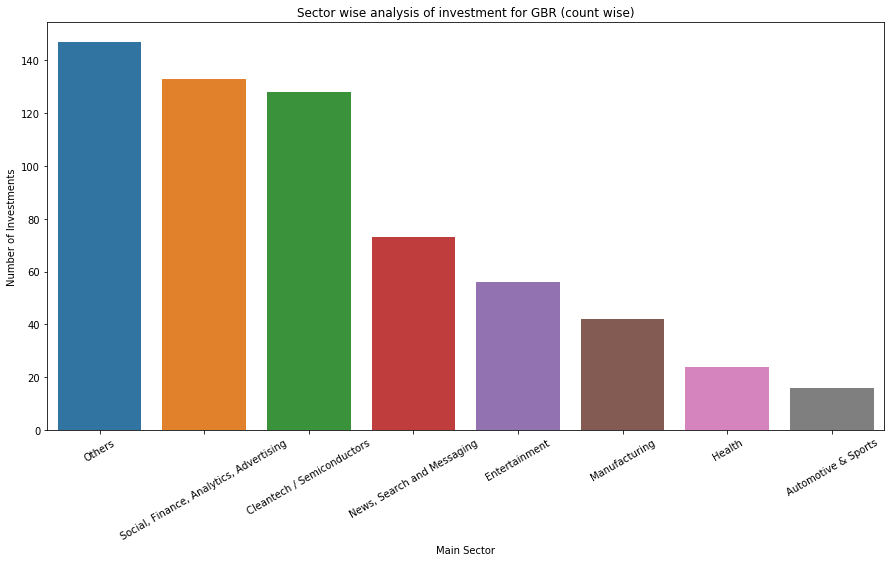

In [400]:
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x='main_sector', y='raised_amount_usd', data=sector_on_investments_count.reset_index())
bar.set(xlabel='Main Sector', ylabel='Number of Investments')
bar.set_title('Sector wise analysis of investment for GBR (count wise)')
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)
plt.show()

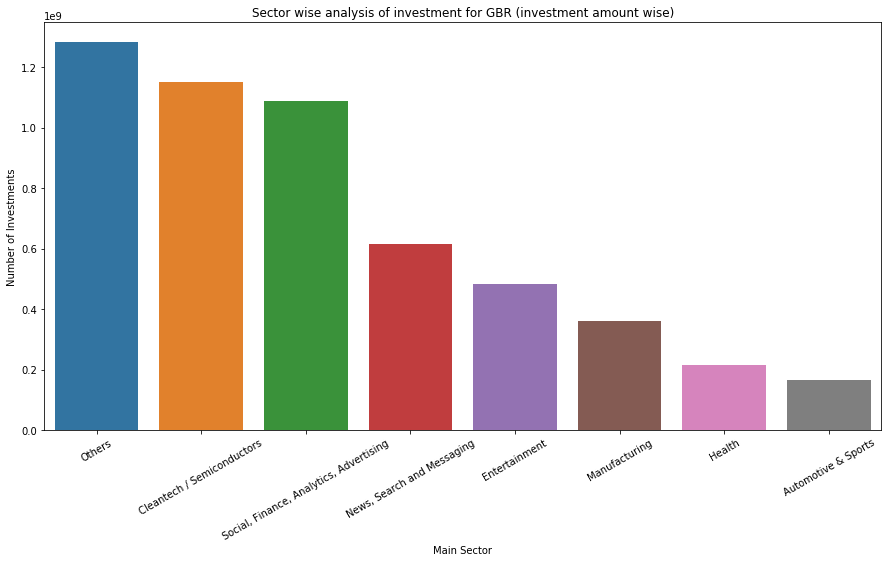

In [401]:
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x = 'main_sector', y = 'raised_amount_usd', data = sector_on_investments_sum.reset_index())
bar.set(xlabel='Main Sector', ylabel='Number of Investments')
bar.set_title('Sector wise analysis of investment for GBR (investment amount wise)')
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)
plt.show()

In [402]:
#Number of investments in the top sector (refer to point 3) for country code GBR
top_sector_investments_count  = sector_on_investments_count.iloc[:1]
top_sector_investments_count

main_sector
Others    147
Name: raised_amount_usd, dtype: int64

In [403]:
#7. Number of investments in the second-best sector (refer to point 4) for country code GBR
second_best_sector_investments_count  = sector_on_investments_count.iloc[1:2]
second_best_sector_investments_count

main_sector
Social, Finance, Analytics, Advertising    133
Name: raised_amount_usd, dtype: int64

In [404]:
#8. Number of investments in the third-best sector (refer to point 5) for country code GBR
third_best_sector_investments_count  = sector_on_investments_count.iloc[2:3]
third_best_sector_investments_count

main_sector
Cleantech / Semiconductors    128
Name: raised_amount_usd, dtype: int64

In [405]:
#9. Number of investments in the top sector ('Others')
d2[d2['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64

In [406]:
#10. Number of investments in the top sector ('Social, Finance, Analytics, Advertising')
d2[d2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
/organization/zopa                    32,900,000.00
/organization/imagini                 28,550,000.00
/organization/marketinvoice           25,553,007.00
Name: raised_amount_usd, dtype: float64

In [407]:

d3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,"136,900,000.00"
Cleantech / Semiconductors,20,"165,380,000.00"
Entertainment,33,"280,830,000.00"
Health,19,"167,740,000.00"
Manufacturing,21,"200,900,000.00"
"News, Search and Messaging",52,"433,834,545.00"
Others,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",60,"550,549,550.00"


In [408]:
#3. Top sector (based on count of investments) for country code IND
#4. Second-best sector (based on count of investments) for country code IND
#5. Third-best sector (based on count of investments) for country code IND
sector_on_investments_count = d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
sector_on_investments_sum = d3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)
sector_on_investments_count

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

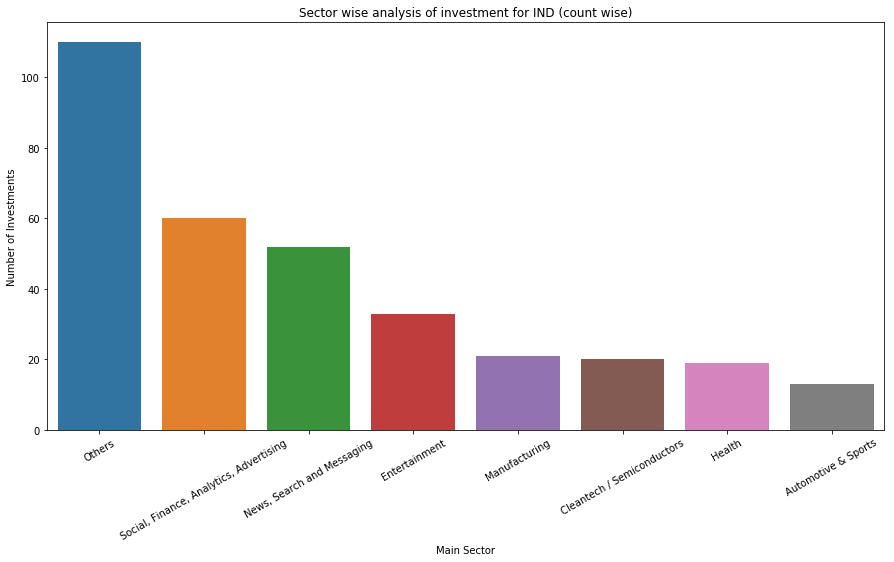

In [409]:
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x='main_sector', y='raised_amount_usd', data=sector_on_investments_count.reset_index())
bar.set(xlabel='Main Sector', ylabel='Number of Investments')
bar.set_title('Sector wise analysis of investment for IND (count wise)')
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)
plt.show()

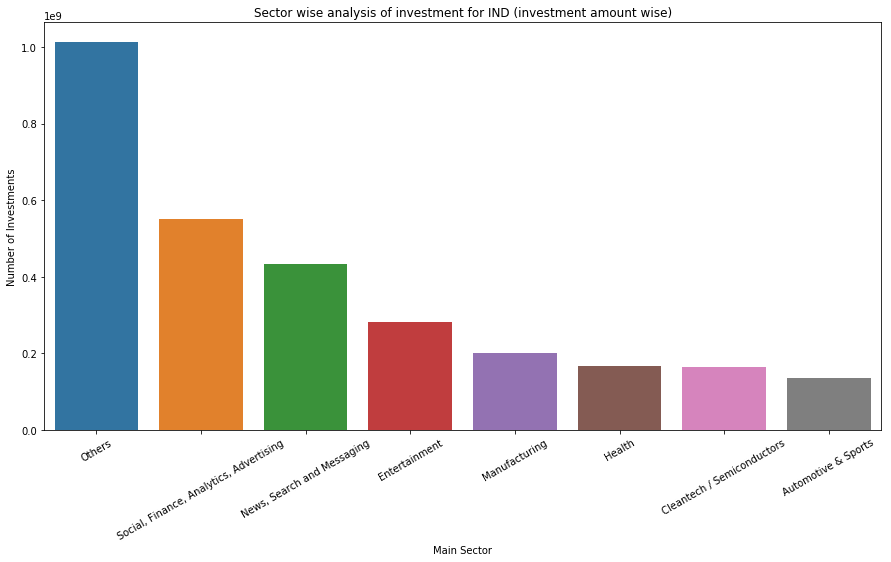

In [410]:
plt.figure(num=None, figsize=(15, 7.5))
bar=sns.barplot(x='main_sector', y='raised_amount_usd', data=sector_on_investments_sum.reset_index())
bar.set(xlabel='Main Sector', ylabel='Number of Investments')
bar.set_title('Sector wise analysis of investment for IND (investment amount wise)')
bar.set_xticklabels(bar.get_xticklabels(), rotation=30)
plt.show()

In [411]:
#Number of investments in the top sector (refer to point 3) for country code IND
investments_count  = sector_on_investments_count.iloc[:1]
investments_count

main_sector
Others    110
Name: raised_amount_usd, dtype: int64

In [412]:
#7. Number of investments in the second-best sector (refer to point 4) for country code IND
second_best_sector_investments_count  = sector_on_investments_count.iloc[1:2]
second_best_sector_investments_count

main_sector
Social, Finance, Analytics, Advertising    60
Name: raised_amount_usd, dtype: int64

In [413]:
#8. Number of investments in the third-best sector (refer to point 5) for country code IND
third_best_sector_investments_count  = sector_on_investments_count.iloc[2:3]
third_best_sector_investments_count

main_sector
News, Search and Messaging    52
Name: raised_amount_usd, dtype: int64

In [414]:
#9. Number of investments in the top sector ('Others')
d3[d3['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/firstcry-com       39,000,000.00
/organization/myntra             38,000,000.00
/organization/commonfloor        32,900,000.00
/organization/pepperfry-com      28,000,000.00
/organization/itzcash-card-ltd   25,000,000.00
Name: raised_amount_usd, dtype: float64

In [415]:
#10. Number of investments in the top sector ('Social, Finance, Analytics, Advertising')
d3[d3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

company_permalink
/organization/manthan-systems              50,700,000.00
/organization/komli-media                  28,000,000.00
/organization/shopclues-com                25,000,000.00
/organization/intarvo                      21,900,000.00
/organization/grameen-financial-services   21,556,050.00
Name: raised_amount_usd, dtype: float64

 ## 6.1 - Plots
1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

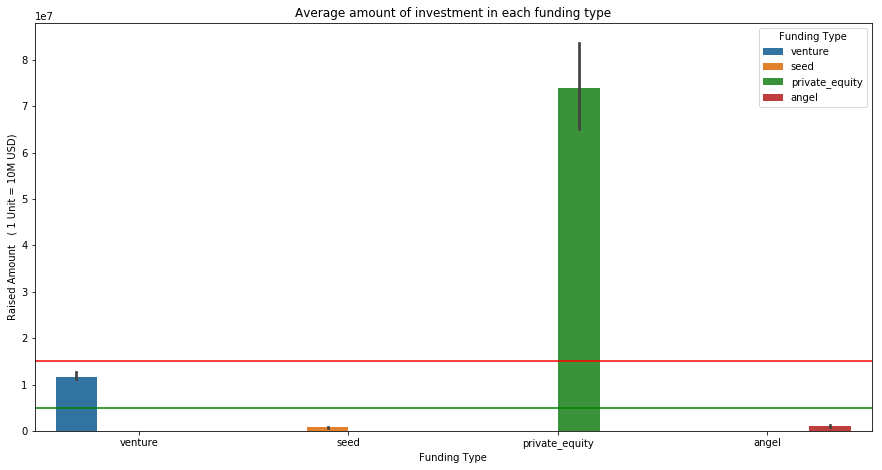

In [416]:
#showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.
plt.figure(figsize = (15,7.5))
bar = sns.barplot(x = 'funding_round_type', y = 'raised_amount_usd', hue="funding_round_type", data = investments_type_mean_frame)
bar.set(xlabel = 'Funding Type', ylabel = 'Raised Amount   ( 1 Unit = 10M USD)')
bar.set_title('Average amount of investment in each funding type')
plt.legend(title = 'Funding Type', loc = 'upper right')
plt.axhline(5000000, color = 'green')
plt.axhline(15000000, color = 'red')
plt.show()

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

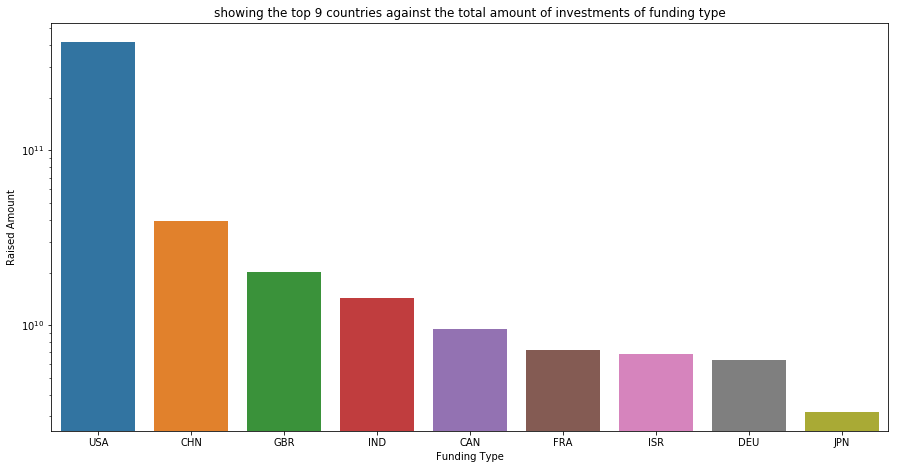

In [417]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries
plt.figure(figsize = (15,7.5))
bar = sns.barplot(x='country_code', y ='raised_amount_usd', data = top9.reset_index())
bar.set_yscale('log')
bar.set(xlabel='Funding Type', ylabel='Raised Amount')
bar.set_title('showing the top 9 countries against the total amount of investments of funding type')
plt.show()


3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT)

In [418]:
#extracting top 3 main sector for country code USA and used for further analysis.
d1_main_sectors_frame = d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
d1_top3_sector_frame = d1_main_sectors_frame.iloc[:3].reset_index()
d1_top3_sector = d1_top3_sector_frame['main_sector']
master_sector_frame = d1[d1['main_sector'].isin(d1_top3_sector)]
master_sector_frame.shape

(7964, 6)

In [419]:
#extracting top 3 main sector for country GBR code and used for further analysis.
d2_main_sectors_frame = d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
d2_top3_sector_frame = d2_main_sectors_frame.iloc[:3].reset_index()
d2_top3_sector = d2_top3_sector_frame['main_sector']
master_sector_frame = master_sector_frame.append(d2[d2['main_sector'].isin(d2_top3_sector)], ignore_index=True)
master_sector_frame.shape


(8372, 6)

In [420]:
#extracting top 3 main sector for country IND code and used for further analysis.
d3_main_sectors_frame = d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)
d3_top3_sector_frame = d3_main_sectors_frame.iloc[:3].reset_index()
d3_top3_sector = d3_top3_sector_frame['main_sector']
master_sector_frame = master_sector_frame.append(d3[d3['main_sector'].isin(d3_top3_sector)], ignore_index=True)
master_sector_frame.shape

(8594, 6)

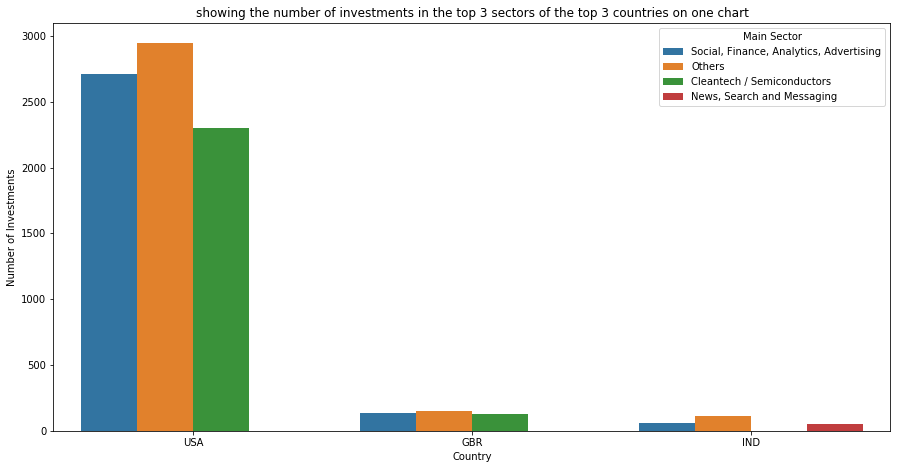

In [421]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
plt.figure(num=None, figsize=(15, 7.5))
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_sector_frame,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
plt.legend(title = 'Main Sector', loc = 'upper right')
s.set_title('showing the number of investments in the top 3 sectors of the top 3 countries on one chart')
plt.show()